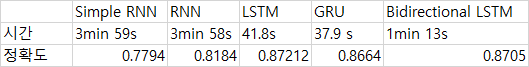

In [0]:
%tensorflow_version 2.x

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, RNN, LSTM, Dense, Dropout, SimpleRNN, GRU, Bidirectional, SimpleRNNCell

In [2]:
vocabulary_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print((len(X_train), len(X_test)))

(25000, 25000)


In [0]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [0]:
batch_size = 256
num_epochs = 8
embedding_size=32

In [0]:
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]

1. SimpleRNN

In [9]:
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(SimpleRNN(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 100)               13300     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 173,401
Trainable params: 173,401
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
%%time
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Epoch 1/8
97/97 [==============================] - 29s 304ms/step - loss: 0.6805 - accuracy: 0.5661 - val_loss: 0.7422 - val_accuracy: 0.5547
Epoch 2/8
97/97 [==============================] - 29s 300ms/step - loss: 0.5158 - accuracy: 0.7419 - val_loss: 0.3669 - val_accuracy: 0.8477
Epoch 3/8
97/97 [==============================] - 30s 310ms/step - loss: 0.5723 - accuracy: 0.7292 - val_loss: 0.6166 - val_accuracy: 0.6523
Epoch 4/8
97/97 [==============================] - 30s 305ms/step - loss: 0.5424 - accuracy: 0.7439 - val_loss: 0.6699 - val_accuracy: 0.5703
Epoch 5/8
97/97 [==============================] - 29s 302ms/step - loss: 0.4781 - accuracy: 0.7740 - val_loss: 0.5302 - val_accuracy: 0.7617
Epoch 6/8
97/97 [==============================] - 30s 305ms/step - loss: 0.2829 - accuracy: 0.8853 - val_loss: 0.4447 - val_accuracy: 0.8281
Epoch 7/8
97/97 [==============================] - 30s 305ms/step - loss: 0.2060 - accuracy: 0.9223 - val_loss: 0.4399 - val_accuracy: 0.8438
Epoch 

In [11]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.7794399857521057


2. RNN

In [12]:
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(RNN(SimpleRNNCell(100)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
rnn (RNN)                    (None, 100)               13300     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 173,401
Trainable params: 173,401
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
%%time
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Epoch 1/8
97/97 [==============================] - 29s 303ms/step - loss: 0.6749 - accuracy: 0.5728 - val_loss: 0.6184 - val_accuracy: 0.6719
Epoch 2/8
97/97 [==============================] - 29s 304ms/step - loss: 0.5608 - accuracy: 0.7241 - val_loss: 0.4774 - val_accuracy: 0.7617
Epoch 3/8
97/97 [==============================] - 29s 303ms/step - loss: 0.4055 - accuracy: 0.8224 - val_loss: 0.3464 - val_accuracy: 0.8672
Epoch 4/8
97/97 [==============================] - 29s 301ms/step - loss: 0.3769 - accuracy: 0.8422 - val_loss: 0.3413 - val_accuracy: 0.8828
Epoch 5/8
97/97 [==============================] - 29s 303ms/step - loss: 0.3424 - accuracy: 0.8594 - val_loss: 0.3534 - val_accuracy: 0.8750
Epoch 6/8
97/97 [==============================] - 30s 305ms/step - loss: 0.3826 - accuracy: 0.8398 - val_loss: 0.3875 - val_accuracy: 0.8516
Epoch 7/8
97/97 [==============================] - 29s 303ms/step - loss: 0.3488 - accuracy: 0.8588 - val_loss: 0.4121 - val_accuracy: 0.8320
Epoch 

In [14]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8184800148010254


3. LSTM

In [6]:
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           160000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
%%time
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Epoch 1/8
97/97 [==============================] - 5s 53ms/step - loss: 0.6604 - accuracy: 0.6207 - val_loss: 0.5823 - val_accuracy: 0.7539
Epoch 2/8
97/97 [==============================] - 5s 50ms/step - loss: 0.4066 - accuracy: 0.8280 - val_loss: 0.3116 - val_accuracy: 0.8828
Epoch 3/8
97/97 [==============================] - 5s 50ms/step - loss: 0.3040 - accuracy: 0.8768 - val_loss: 0.3061 - val_accuracy: 0.8828
Epoch 4/8
97/97 [==============================] - 5s 50ms/step - loss: 0.2553 - accuracy: 0.9016 - val_loss: 0.2720 - val_accuracy: 0.9062
Epoch 5/8
97/97 [==============================] - 5s 49ms/step - loss: 0.2171 - accuracy: 0.9184 - val_loss: 0.2385 - val_accuracy: 0.9102
Epoch 6/8
97/97 [==============================] - 5s 49ms/step - loss: 0.1971 - accuracy: 0.9281 - val_loss: 0.2543 - val_accuracy: 0.9023
Epoch 7/8
97/97 [==============================] - 5s 49ms/step - loss: 0.1841 - accuracy: 0.9317 - val_loss: 0.2616 - val_accuracy: 0.8984
Epoch 8/8
97/97 [===

In [8]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8721200227737427


4. GRU

In [15]:
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(GRU(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
gru (GRU)                    (None, 100)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 200,301
Trainable params: 200,301
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
%%time
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Epoch 1/8
97/97 [==============================] - 5s 49ms/step - loss: 0.6688 - accuracy: 0.6042 - val_loss: 0.6206 - val_accuracy: 0.6680
Epoch 2/8
97/97 [==============================] - 5s 48ms/step - loss: 0.4518 - accuracy: 0.7935 - val_loss: 0.2914 - val_accuracy: 0.8555
Epoch 3/8
97/97 [==============================] - 5s 47ms/step - loss: 0.2840 - accuracy: 0.8837 - val_loss: 0.3204 - val_accuracy: 0.8789
Epoch 4/8
97/97 [==============================] - 4s 46ms/step - loss: 0.2403 - accuracy: 0.9058 - val_loss: 0.2714 - val_accuracy: 0.8906
Epoch 5/8
97/97 [==============================] - 4s 45ms/step - loss: 0.2188 - accuracy: 0.9160 - val_loss: 0.2478 - val_accuracy: 0.9062
Epoch 6/8
97/97 [==============================] - 4s 46ms/step - loss: 0.2034 - accuracy: 0.9220 - val_loss: 0.2661 - val_accuracy: 0.8906
Epoch 7/8
97/97 [==============================] - 4s 45ms/step - loss: 0.1842 - accuracy: 0.9313 - val_loss: 0.2381 - val_accuracy: 0.9141
Epoch 8/8
97/97 [===

In [17]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8664399981498718


5. Bidirectional-LSTM

In [18]:
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               106400    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 266,601
Trainable params: 266,601
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
%%time
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Epoch 1/8
97/97 [==============================] - 9s 95ms/step - loss: 0.6020 - accuracy: 0.6933 - val_loss: 0.3538 - val_accuracy: 0.8398
Epoch 2/8
97/97 [==============================] - 9s 91ms/step - loss: 0.3732 - accuracy: 0.8412 - val_loss: 0.2953 - val_accuracy: 0.8984
Epoch 3/8
97/97 [==============================] - 9s 91ms/step - loss: 0.2669 - accuracy: 0.8943 - val_loss: 0.2351 - val_accuracy: 0.9219
Epoch 4/8
97/97 [==============================] - 9s 91ms/step - loss: 0.2294 - accuracy: 0.9116 - val_loss: 0.2952 - val_accuracy: 0.8672
Epoch 5/8
97/97 [==============================] - 9s 90ms/step - loss: 0.2023 - accuracy: 0.9246 - val_loss: 0.2399 - val_accuracy: 0.9023
Epoch 6/8
97/97 [==============================] - 9s 90ms/step - loss: 0.1815 - accuracy: 0.9332 - val_loss: 0.2411 - val_accuracy: 0.9102
Epoch 7/8
97/97 [==============================] - 9s 91ms/step - loss: 0.1645 - accuracy: 0.9417 - val_loss: 0.2824 - val_accuracy: 0.8984
Epoch 8/8
97/97 [===

In [20]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8705199956893921
